<center><font size=6>Credit Card Bank Churn Prediction </font></center>

---



In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.9 MB/s eta 0:00:00


## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

In [ ]:
print(tf.__version__)

2.15.0


## Loading the dataset

In [3]:
# uncomment and run the following lines in case Google Colab is being used
# from google.colab import drive
# drive.mount("/gdrive")
# %cd /gdrive/My Drive/Project 4 - Bank Churn Prediction

In [4]:
# loading the dataset
url = "https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Bank_customer_Churn.csv"
data = pd.read_csv(".csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Churn.csv'

## Data Overview

In [ ]:
# View Top 10 records in the dataset
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
#View bottom 10 records in the dataset
data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# View the shape of the data set.
# How Many features and Observations
data.shape

(10000, 14)

Observation:
* There are 21 features and 10127 observations

**Statistical Summary of the dataset**

In [ ]:
# Statistical analysis of the Numeric or continious data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


- Observations
  *   customerid should not be a numeric value.
  *   Avg age of the customers is 38
  *   Max number of Credit Card used by the population is 4
  *   Oldest person in this dataset is 92

**Checking for Missing values**

In [ ]:
# checking for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observation:** There are no missing values

**Checking for Duplicate Values**

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

**Observation**
* There are no duplicate values in the data.

**Determining the unique values in each columns/features in the data set**

In [ ]:
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Feature '{column}' has {unique_values} unique value(s).")

Feature 'RowNumber' has 10000 unique value(s).
Feature 'CustomerId' has 10000 unique value(s).
Feature 'Surname' has 2932 unique value(s).
Feature 'CreditScore' has 460 unique value(s).
Feature 'Geography' has 3 unique value(s).
Feature 'Gender' has 2 unique value(s).
Feature 'Age' has 70 unique value(s).
Feature 'Tenure' has 11 unique value(s).
Feature 'Balance' has 6382 unique value(s).
Feature 'NumOfProducts' has 4 unique value(s).
Feature 'HasCrCard' has 2 unique value(s).
Feature 'IsActiveMember' has 2 unique value(s).
Feature 'EstimatedSalary' has 9999 unique value(s).
Feature 'Exited' has 2 unique value(s).


In [ ]:
# Dropping the Feature customerid and Surname because every observation is unique
data = data.drop(["CustomerId"], axis=1)
data = data.drop(["Surname"], axis=1)
data = data.drop(["RowNumber"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### EDA Functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",hue=None
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

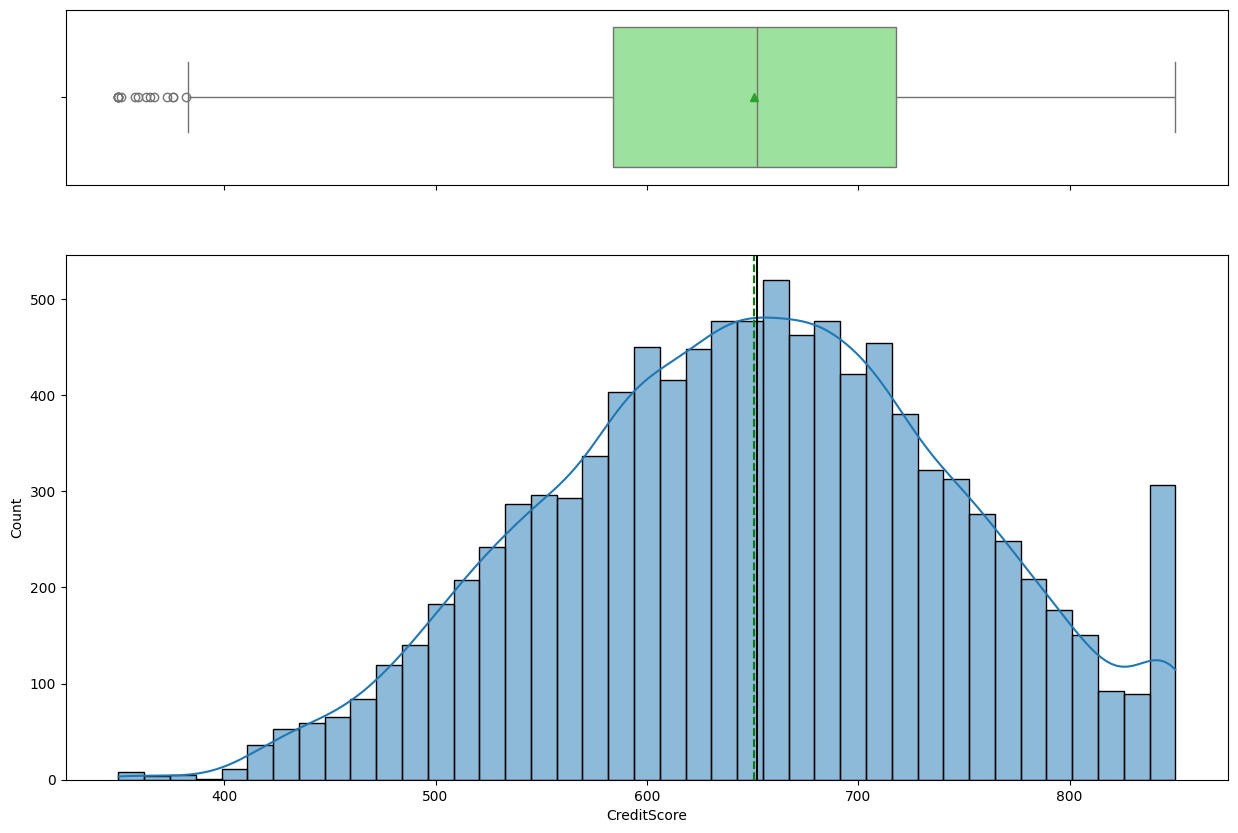

In [ ]:
histogram_boxplot(data, "CreditScore", kde=True)

**Observation**
* Credit Score is very slightly left skewed.
* There are few outliers with low credit scores.

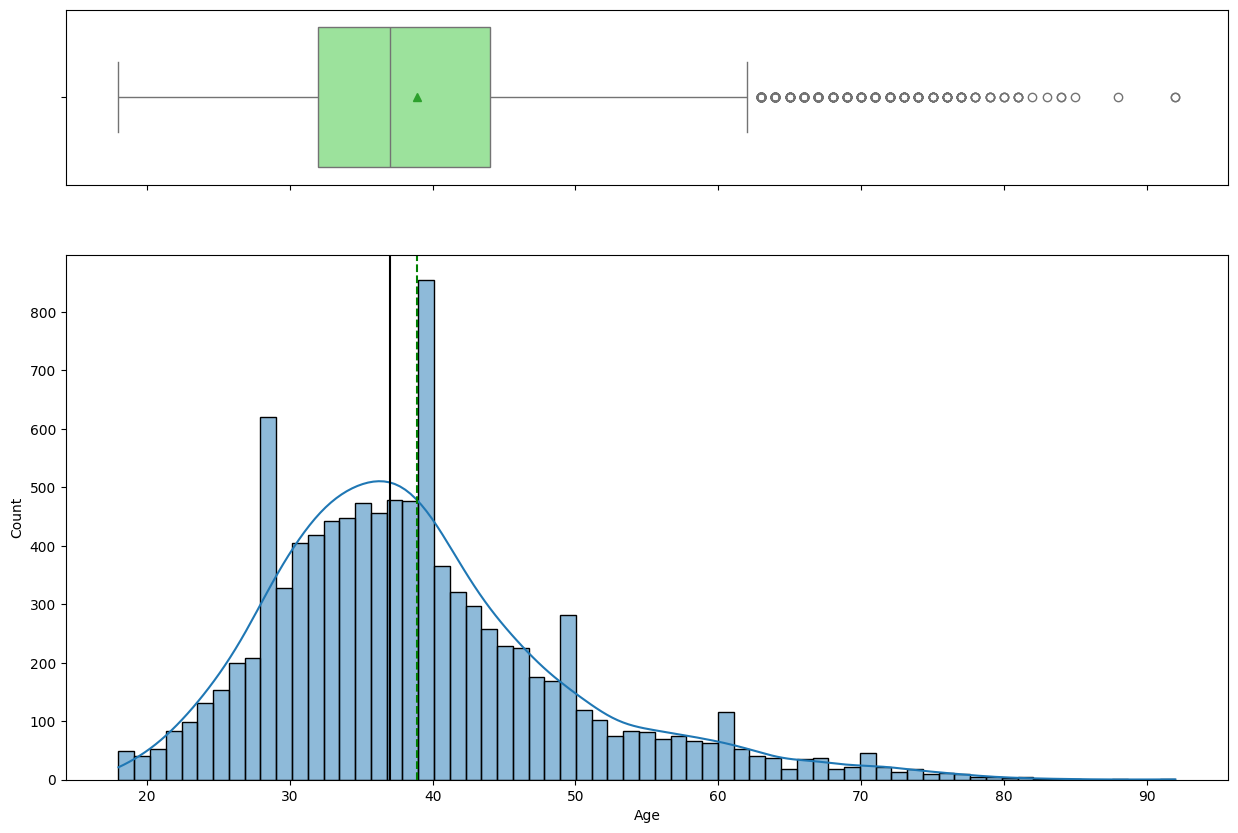

In [ ]:
histogram_boxplot(data, "Age", kde=True)

**Observation**
* Age is skewed to the right.
* There are outliers for age.

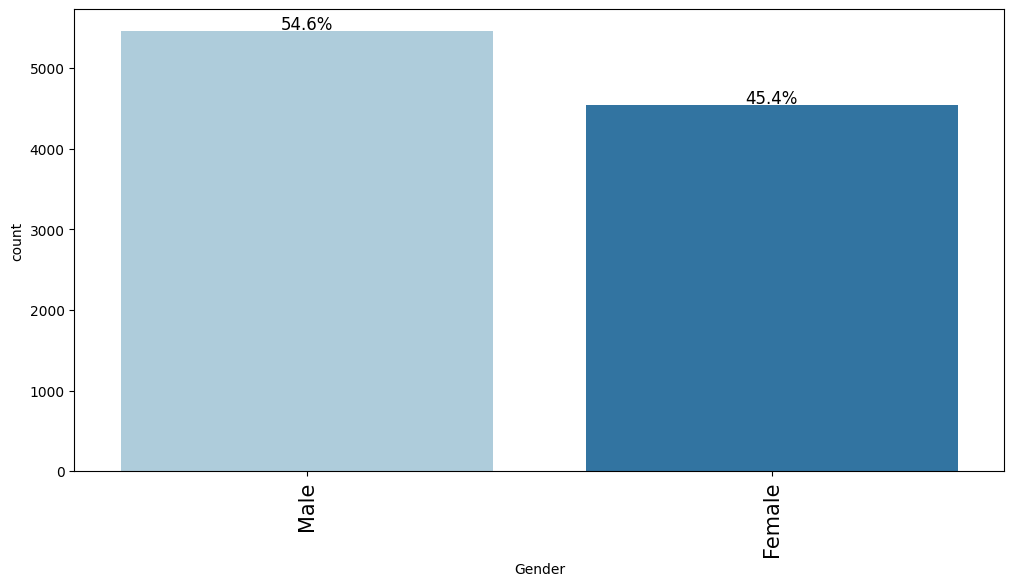

In [ ]:
labeled_barplot(data, "Gender", perc=True, n=10)

**Observation**
* In this dataset, 54% of the observations are Male


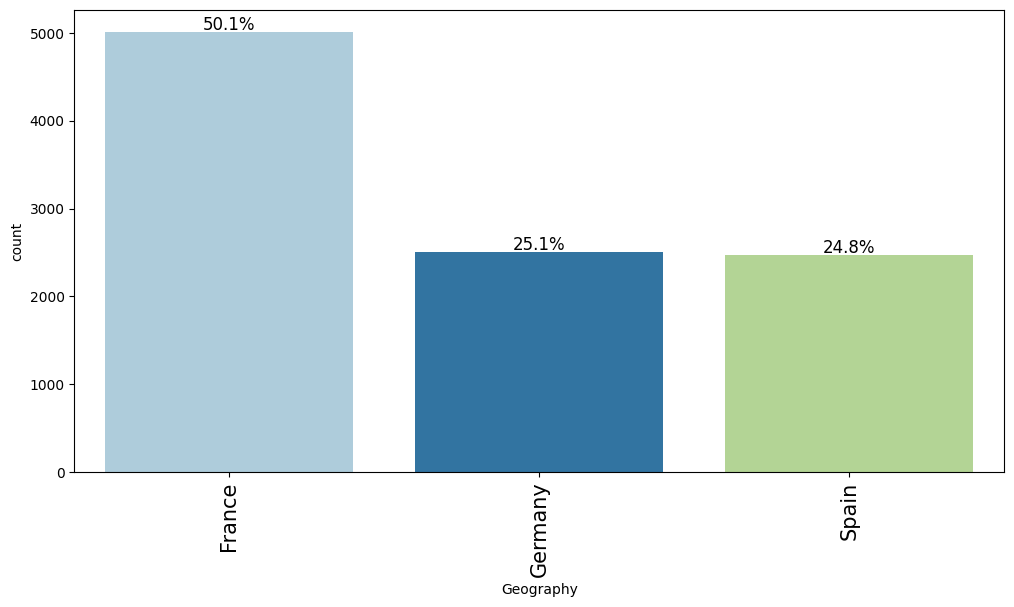

In [ ]:
labeled_barplot(data, "Geography", perc=True, n=10)

**Observation**
* In this dataset, 50% of the observations are from France
* In this dataset, 25% of the observations are from Germany and rest from Spain.

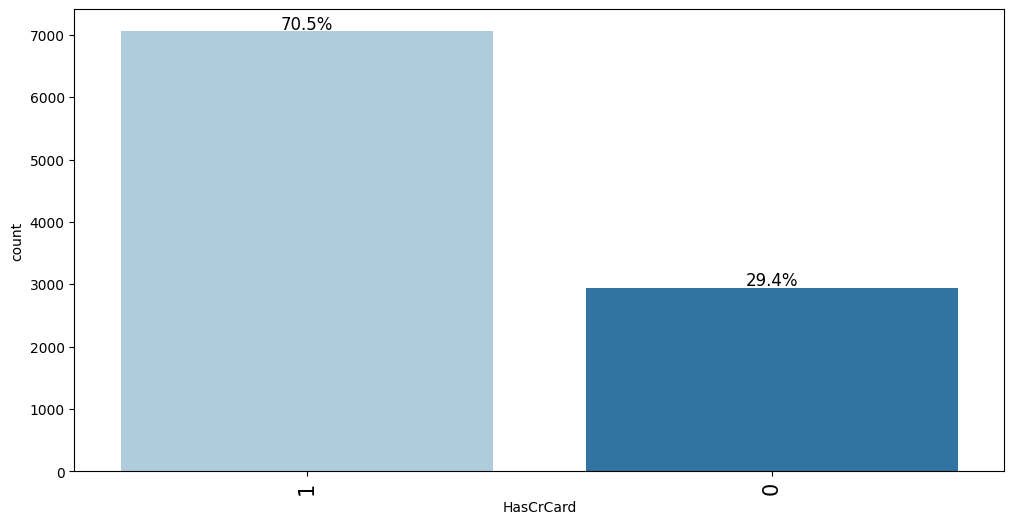

In [ ]:
labeled_barplot(data, "HasCrCard", perc=True, n=10)

**Observation**
* In this dataset, 70% of the population have Credit Card


### Bivariate Analysis

**Location Vs Estimated Salary**

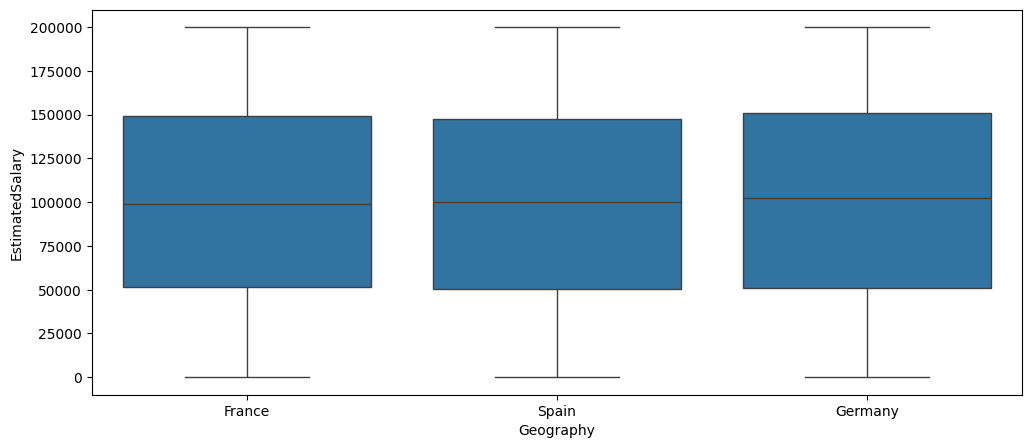

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Geography", y="EstimatedSalary", data=data)
plt.show()

**Observation**
*   The Estimated Salary looks the same across all locations

**Geography Vs Credit Card**

HasCrCard     0     1    All
Geography                   
All        2945  7055  10000
France     1471  3543   5014
Spain       756  1721   2477
Germany     718  1791   2509
------------------------------------------------------------------------------------------------------------------------


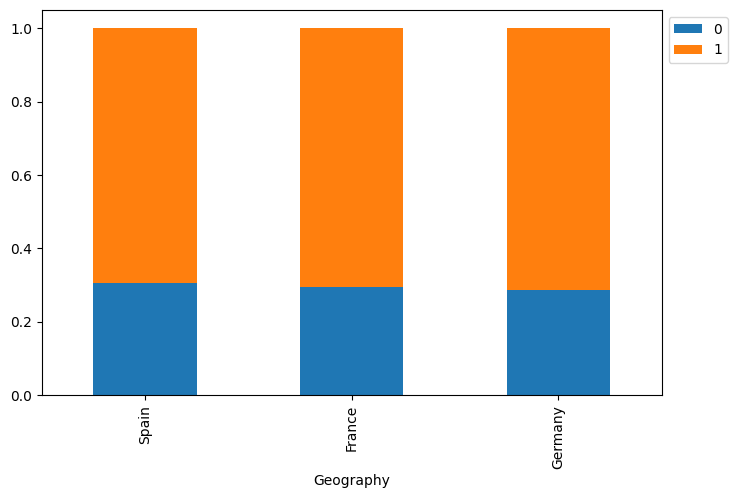

In [ ]:
stacked_barplot(data, "Geography", "HasCrCard")

**Observation**
*   Credit Card Usage across all locations are same.

**Credit Card Customers Exited Vs Stayed**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


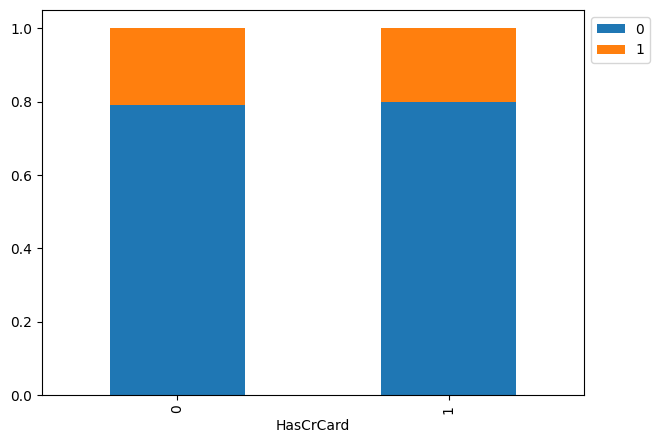

In [ ]:
stacked_barplot(data, "HasCrCard","Exited")

**Observation**
*   percent of Credit Card customers who has exited and stayed almost the same.

**Num of Products Vs Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


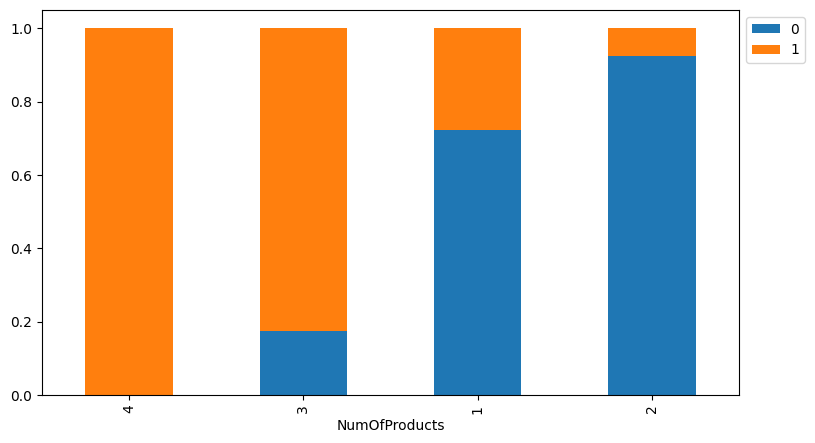

In [ ]:
stacked_barplot(data, "NumOfProducts","Exited")

**Observation**

*   Customers having 3 or more products have stayed longer.
*   Customers with 4 products has zero Exited

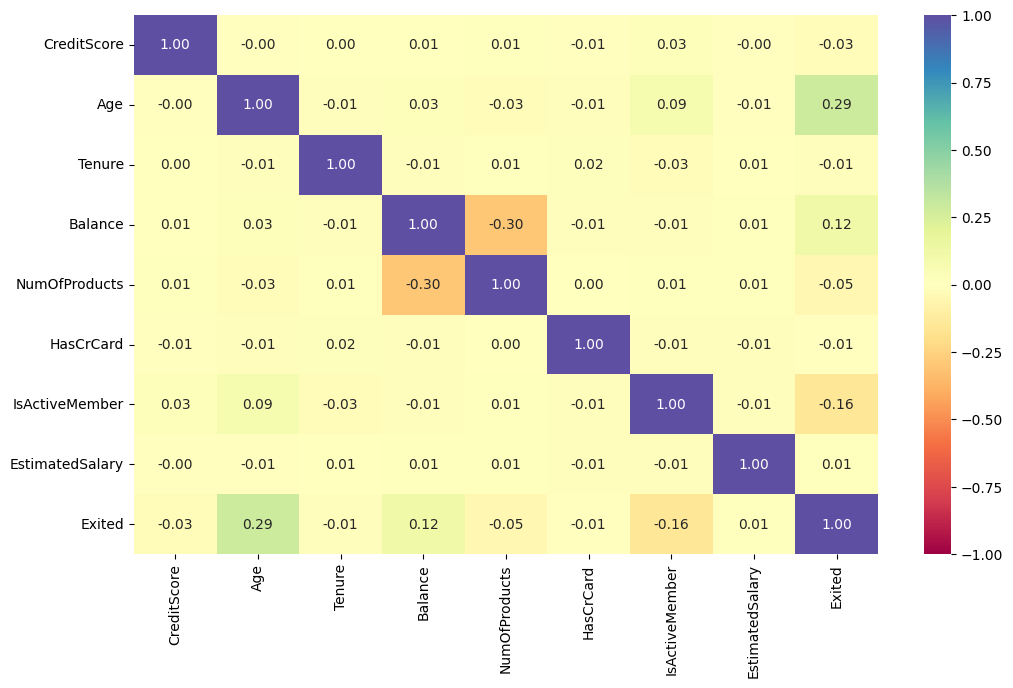

In [ ]:
# What are the attributes that have a strong correlation with each other? We are including Attrition Flag column after converting this in to an integer
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation**

*   There are no strong negative or positive correlation
*   There is a slight correlation between Age of the customer and Exited feature.

In [ ]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing

In [ ]:
df = data.copy()

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dummy Variable Creation

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Feature '{column}' has {unique_values} unique value(s).")

Feature 'CreditScore' has 460 unique value(s).
Feature 'Geography' has 3 unique value(s).
Feature 'Gender' has 2 unique value(s).
Feature 'Age' has 70 unique value(s).
Feature 'Tenure' has 11 unique value(s).
Feature 'Balance' has 6382 unique value(s).
Feature 'NumOfProducts' has 4 unique value(s).
Feature 'HasCrCard' has 2 unique value(s).
Feature 'IsActiveMember' has 2 unique value(s).
Feature 'EstimatedSalary' has 9999 unique value(s).
Feature 'Exited' has 2 unique value(s).


In [ ]:
# Define the bins and labels for customer age.
bins = [0, 25, 50, 75, float('inf')]
labels = ['0-25', '26-50', '51-75', '76+']

In [ ]:
# Categorize the 'Customer_Age' using cut
df['Age_Cat'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
csbins = [0,300, 630, 690, 720, float('inf')]
cslabels = ['Very Bad', 'Bad', 'Fair','Good','Excellent']

In [ ]:
# Categorize the 'Credit Score' using cut
df['CreditScoreGrades'] = pd.cut(df['CreditScore'], bins=csbins, labels=cslabels, right=False)

In [ ]:
# Dropping the Feature Customer_Age and CreditScore as we have categorized
df = df.drop(["Age"], axis=1)
df = df.drop(["CreditScore"], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Geography          10000 non-null  object  
 1   Gender             10000 non-null  object  
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_Cat            10000 non-null  category
 10  CreditScoreGrades  10000 non-null  category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 723.2+ KB


In [ ]:
# Lets convert the columns with an 'object' datatype into categorical variables
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Geography          10000 non-null  category
 1   Gender             10000 non-null  category
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_Cat            10000 non-null  category
 10  CreditScoreGrades  10000 non-null  category
dtypes: category(4), float64(2), int64(5)
memory usage: 586.7 KB


In [ ]:
unique_values = df['Tenure'].unique()
print(unique_values)

[ 2  1  8  7  4  6  3 10  5  9  0]


In [ ]:
df.head(10)

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,CreditScoreGrades
0,France,Female,2,0.00,1,1,1,101348.88,1,26-50,Bad
1,Spain,Female,1,83807.86,1,0,1,112542.58,0,26-50,Bad
2,France,Female,8,159660.80,3,1,0,113931.57,1,26-50,Bad
3,France,Female,1,0.00,2,0,0,93826.63,0,26-50,Good
4,Spain,Female,2,125510.82,1,1,1,79084.10,0,26-50,Excellent
5,Spain,Male,8,113755.78,2,1,0,149756.71,1,26-50,Fair
6,France,Male,7,0.00,2,1,1,10062.80,0,51-75,Excellent
7,Germany,Female,4,115046.74,4,1,0,119346.88,1,26-50,Bad
8,France,Male,4,142051.07,2,0,1,74940.50,0,26-50,Bad
9,France,Male,2,134603.88,1,1,1,71725.73,0,26-50,Fair


In [ ]:

oneHotCols=["Geography","Gender","Age_Cat", "Gender","NumOfProducts","HasCrCard","Tenure","CreditScoreGrades","IsActiveMember"]

In [ ]:
#df=df.replace(replaceStruct)
#df=pd.get_dummies(df, columns=oneHotCols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Geography          10000 non-null  category
 1   Gender             10000 non-null  category
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_Cat            10000 non-null  category
 10  CreditScoreGrades  10000 non-null  category
dtypes: category(4), float64(2), int64(5)
memory usage: 586.7 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Geography          10000 non-null  category
 1   Gender             10000 non-null  category
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  int64   
 9   Age_Cat            10000 non-null  category
 10  CreditScoreGrades  10000 non-null  category
dtypes: category(4), float64(2), int64(5)
memory usage: 586.7 KB


### Train-validation-test Split

In [ ]:
## Separating Independent and Dependent Columns
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

In [ ]:
X.columns

Index(['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Age_Cat',
       'CreditScoreGrades'],
      dtype='object')

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_valid.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6400
Number of rows in validation data = 1600
Number of rows in test data = 2000


In [ ]:
# Encoding the categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, columns=oneHotCols,drop_first=True)
# Encoding the categorical variables using one-hot encoding
X_test = pd.get_dummies(X_test, columns=oneHotCols,drop_first=True)
# Encoding the categorical variables using one-hot encoding
X_valid = pd.get_dummies(X_valid, columns=oneHotCols,drop_first=True)

In [ ]:
transformer = StandardScaler()
X_train[["Balance","EstimatedSalary"]] = transformer.fit_transform(X_train[["Balance","EstimatedSalary"]])
X_valid[["Balance","EstimatedSalary"]] = transformer.fit_transform(X_valid[["Balance","EstimatedSalary"]])
X_test[["Balance","EstimatedSalary"]] = transformer.fit_transform(X_test[["Balance","EstimatedSalary"]])

In [ ]:
X_train.head()

,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Age_Cat_26-50,Age_Cat_51-75,Age_Cat_76+,Gender_Male,NumOfProducts_2,...,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,CreditScoreGrades_Bad,CreditScoreGrades_Fair,CreditScoreGrades_Good,CreditScoreGrades_Excellent,IsActiveMember_1
3006,0.610704,1.566070,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5735,-1.237347,0.036348,False,True,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
5652,-1.237347,1.745403,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
26,0.962063,1.228816,True,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3596,1.144427,-0.764748,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
def print_missing_values_columns(df):
    missing_values_columns = df.columns[df.isnull().any()]
    missing_values_counts = df[missing_values_columns].isnull().sum()
    print(missing_values_counts)

### Data Normalization

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6400 entries, 3006 to 1558
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Balance                      6400 non-null   float64
 1   EstimatedSalary              6400 non-null   float64
 2   Geography_Germany            6400 non-null   bool   
 3   Geography_Spain              6400 non-null   bool   
 4   Gender_Male                  6400 non-null   bool   
 5   Age_Cat_26-50                6400 non-null   bool   
 6   Age_Cat_51-75                6400 non-null   bool   
 7   Age_Cat_76+                  6400 non-null   bool   
 8   Gender_Male                  6400 non-null   bool   
 9   NumOfProducts_2              6400 non-null   bool   
 10  NumOfProducts_3              6400 non-null   bool   
 11  NumOfProducts_4              6400 non-null   bool   
 12  HasCrCard_1                  6400 non-null   bool   
 13  Tenure_1            

## Model Building

In [ ]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.R2Score(name="r2_score")]

### Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)

### Model Evaluation Criterion

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 50
batch_size = 64

### Model 0 -  Neural Network with SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=28))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                406       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 519 (2.03 KB)
Trainable params: 519 (2.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
y_valid = y_valid.astype(np.float32)




In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid),batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: 1.4040 - val_loss: 0.7242
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 1.3766 - val_loss: 0.7004
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3667 - val_loss: 0.6932
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3568 - val_loss: 0.6894
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 1.3444 - val_loss: 0.6872
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3281 - val_loss: 0.6827
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 1.3080 - val_loss: 0.6811
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 1.2838 - val_loss: 0.6710
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 1.2560 - val_loss: 0.6711
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 1.2263 - val_loss: 0.6510

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.892659187316895


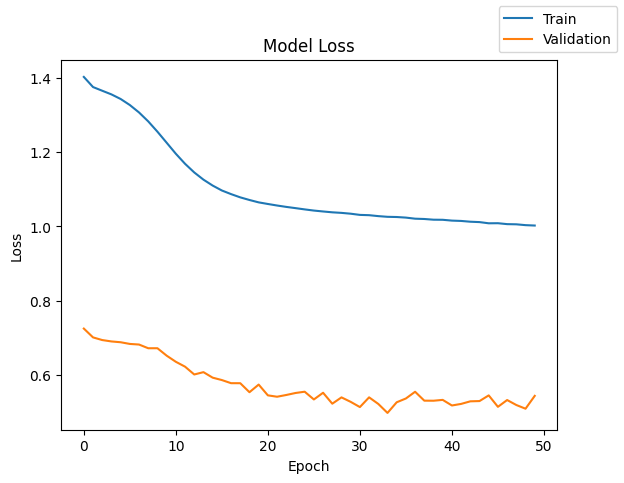

In [ ]:
plot(history,'loss')

**Observation**
* You can visualize the training process by plotting the loss values.
* The x-axis represents the number of epochs (training iterations), and the y-axis represents the loss (error).
* The blue line corresponds to the training loss, while the orange line represents the validation loss.
* Ideally, both lines should decrease over epochs. If the training loss decreases but the validation loss increases, it could indicate overfitting.

**Interpreting the Plot Above**

* A decreasing training loss indicates that the model is learning from the training data.
* A stable validation loss suggests that the model generalizes well to unseen data.
* If the validation loss starts increasing significantly, we may have to consider stopping training early (to prevent overfitting).

In [ ]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.748437,0.748437,0.823187,0.76937


In [ ]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.726875,0.726875,0.81548,0.750937


**Observation**
These metrics give us insights into how well each model is performing. Accuracy measures overall correctness, recall focuses on true positive rate, precision emphasizes positive predictions’ correctness, and F1 score balances precision and recall. X_train seems to perform reasonably well, but further analysis (such as confusion matrices) would be helpful to understand its strengths and weaknesses.

### Model 1 Neural Network with SGD Optimizer

- After the 5th epoch, the model's rate of learning is low.
- Let's try adding momentum to check whether it's accelerating the learning process.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                406       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 519 (2.03 KB)
Trainable params: 519 (2.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 1.1785 - val_loss: 0.5543
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0652 - val_loss: 0.4956
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0486 - val_loss: 0.5527
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0308 - val_loss: 0.5206
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 1.0154 - val_loss: 0.4568
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 1.0089 - val_loss: 0.5044
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.9932 - val_loss: 0.4697
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.9947 - val_loss: 0.5460
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.9879 - val_loss: 0.6170
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.9877 - val_loss: 0.5087

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  15.603947639465332


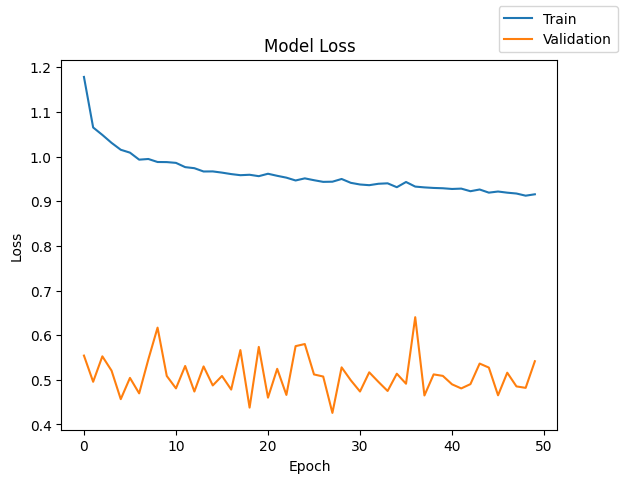

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.757188,0.757188,0.841004,0.778401


In [ ]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.721875,0.721875,0.813875,0.746659


**Observation**

Accuracy:
- Model 0: High accuracy in training, but a slight dip in validation.
- Model 1: Perfect training accuracy, but validation accuracy needs a little boost.

Recall:
- Both models have similar recall scores—capturing positive cases effectively.

Precision:
- Model 0: Good precision.
- Model 1: Holding up well.

F1 Score:
- Model 0: Balanced performance.
- Model 1: Respectable, but room for improvement.

The Verdict:
- Model 0 seems more cautious (lower accuracy, higher precision).
- Model 1 swings for the fences (perfect accuracy, balanced F1 score).

Next Steps
- Investigate why Model 1’s validation accuracy lags behind.

### Model 2 - Neural Network with Adam Optimizer

- Let's change the optimizer to Adam
    - This will introduce momentum as well as an adaptive learning rate

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                406       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 519 (2.03 KB)
Trainable params: 519 (2.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 1.3093 - val_loss: 0.5836
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1731 - val_loss: 0.5470
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 1.0907 - val_loss: 0.5472
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0556 - val_loss: 0.5329
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 1.0367 - val_loss: 0.5189
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0239 - val_loss: 0.5061
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 1.0146 - val_loss: 0.5219
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0071 - val_loss: 0.5057
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 1.0006 - val_loss: 0.5384
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.9949 - val_loss: 0.5083

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.06143808364868


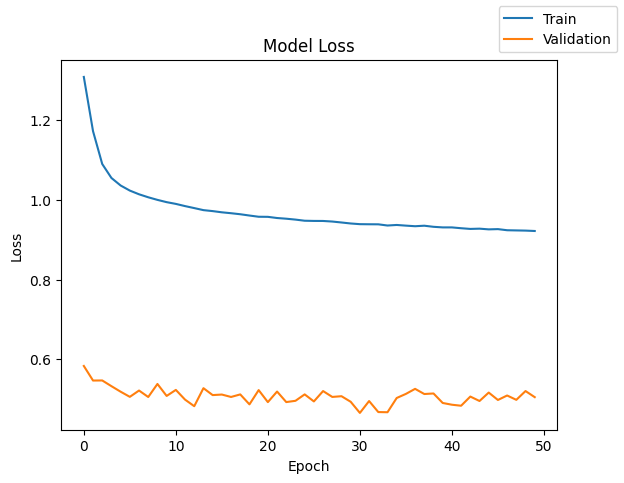

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.770625,0.770625,0.835969,0.788854


In [ ]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.75375,0.75375,0.824504,0.773817


**Observation**

- Accuracy: Model 2 has the highest accuracy on both training and validation data. It seems to be a keen learner!
- F1 Score: Model 0 and Model 2 are neck-and-neck here. They are very close.

### Model 3 - Neural Network with Adam Optimizer and Dropout

- The difference between the train loss and test loss is high.
- Let's add dropout to regularize it.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                406       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 519 (2.03 KB)
Trainable params: 519 (2.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 1.4032 - val_loss: 0.6516
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 1.3432 - val_loss: 0.6229
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 1.2827 - val_loss: 0.5968
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 1.2350 - val_loss: 0.5785
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 1.2111 - val_loss: 0.5620
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1694 - val_loss: 0.5324
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1674 - val_loss: 0.5335
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 1.1610 - val_loss: 0.5343
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1386 - val_loss: 0.5347
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 1.1229 - val_loss: 0.5183

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.609743118286133


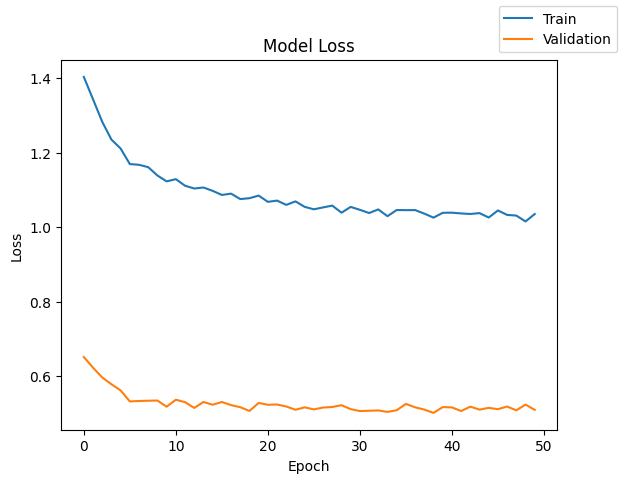

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.776875,0.776875,0.830348,0.793008


In [ ]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.761875,0.761875,0.821365,0.779837


** Observation**
- Model 3 seems to strike a balance between precision and recall. While its accuracy isn’t the highest, it manages to maintain competitive F1 scores.

### Model 4 - Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_balanced.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/50
255/255 [==============================] - 1s 3ms/step - loss: 0.6683 - accuracy: 0.6009 - val_loss: 0.6513 - val_accuracy: 0.6606
Epoch 2/50
255/255 [==============================] - 1s 2ms/step - loss: 0.6320 - accuracy: 0.6778 - val_loss: 0.6167 - val_accuracy: 0.6758
Epoch 3/50
255/255 [==============================] - 1s 3ms/step - loss: 0.5972 - accuracy: 0.6951 - val_loss: 0.5826 - val_accuracy: 0.7052
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.5652 - accuracy: 0.7180 - val_loss: 0.5523 - val_accuracy: 0.7219
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.5402 - accuracy: 0.7314 - val_loss: 0.5309 - val_accuracy: 0.7396
Epoch 6/50
255/255 [==============================] - 1s 4ms/step - loss: 0.5249 - accuracy: 0.7389 - val_loss: 0.5197 - val_accuracy: 0.7401
Epoch 7/50
255/255 [==============================] - 1s 4ms/step - loss: 0.5158 - accuracy: 0.7407 - val_loss: 0.5112 - val_accuracy: 0.7464
Epoch 

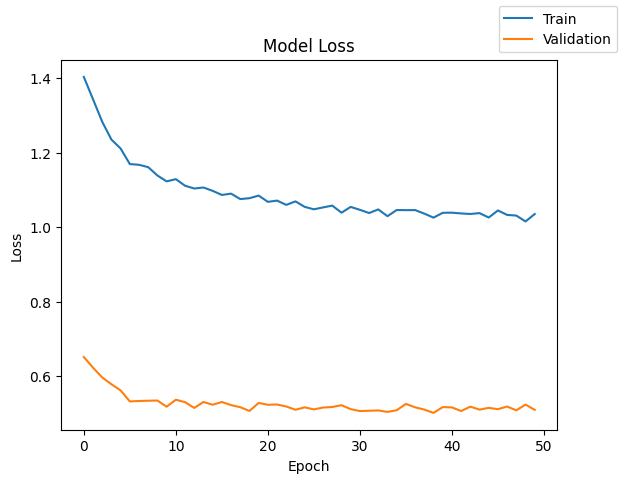

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

255/255 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.786214,0.786214,0.790286,0.785459


In [ ]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

64/64 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.780775,0.780775,0.783244,0.780303


**Observations**
- Model 4 demonstrates consistent performance across both training and validation datasets.
- Its accuracy, recall, precision, and F1 score are all in close alignment.
- This stability can be valuable in real-world applications where reliability matters.
- The F1 score (harmonic mean of precision and recall) suggests that Model 4 maintains a good balance between correctly identifying positive cases (recall) and minimizing false positives (precision).
- Balanced metrics are crucial for scenarios where both precision and recall are important (e.g., medical diagnoses).
- Model 4 follows a straightforward approach without unnecessary complexity.
- While stable, Model 4’s metrics don’t stand out significantly.
- It might not excel in scenarios where high accuracy or precision is crucial.


### Model 5 - Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_balanced.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model with the Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
start - time.time()
history = model.fit(X_train, y_train, epochs=75, batch_size=64, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/75
128/128 [==============================] - 1s 4ms/step - loss: 0.5665 - accuracy: 0.7056 - val_loss: 0.5008 - val_accuracy: 0.7509
Epoch 2/75
128/128 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7522 - val_loss: 0.4850 - val_accuracy: 0.7558
Epoch 3/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7616 - val_loss: 0.4724 - val_accuracy: 0.7631
Epoch 4/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7693 - val_loss: 0.4708 - val_accuracy: 0.7661
Epoch 5/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7786 - val_loss: 0.4530 - val_accuracy: 0.7783
Epoch 6/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7856 - val_loss: 0.4482 - val_accuracy: 0.7876
Epoch 7/75
128/128 [==============================] - 1s 4ms/step - loss: 0.4371 - accuracy: 0.7927 - val_loss: 0.4397 - val_accuracy: 0.7906
Epoch 

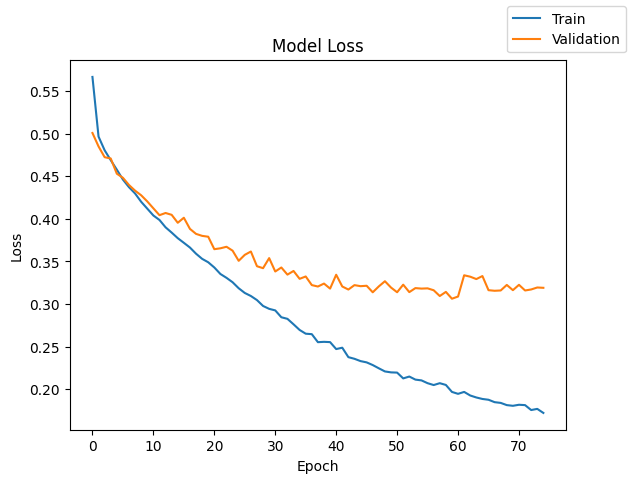

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

255/255 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.939777,0.939777,0.939777,0.939777


In [ ]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

64/64 [==============================] - 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.870525,0.870525,0.871345,0.870451


**Observation**
- Model 5 achieves impressive accuracy on the training data.
- It’s a reliable performer when it comes to overall correctness.
- The F1 score suggests that Model 5 maintains a good balance between precision and recall.
- This balance is crucial for scenarios where false positives and false negatives matter equally.
- While the training performance is stellar, the validation accuracy is notably lower.
- We need to investigate whether Model 5 is overfitting to the training data.
- The high training accuracy might lead to overconfidence.
- We should validate its performance on unseen data to ensure it generalizes well.

### Model 6 - Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_balanced.shape[1]))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

In [ ]:
# Compile the model with the Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/50
255/255 [==============================] - 3s 5ms/step - loss: 0.5719 - accuracy: 0.6967 - val_loss: 0.4943 - val_accuracy: 0.7563
Epoch 2/50
255/255 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.7548 - val_loss: 0.4802 - val_accuracy: 0.7641
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.4867 - accuracy: 0.7625 - val_loss: 0.4663 - val_accuracy: 0.7793
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.4746 - accuracy: 0.7697 - val_loss: 0.4604 - val_accuracy: 0.7759
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7766 - val_loss: 0.4477 - val_accuracy: 0.7886
Epoch 6/50
255/255 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7846 - val_loss: 0.4434 - val_accuracy: 0.7886
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.7839 - val_loss: 0.4359 - val_accuracy: 0.7950
Epoch 

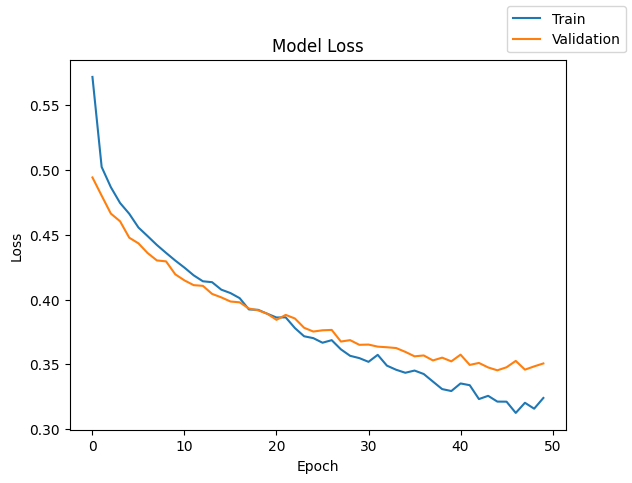

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

255/255 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.895744,0.895744,0.89712,0.895653


In [ ]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

64/64 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.845022,0.845022,0.845997,0.844915


**Observation**
- High training accuracy, balanced metrics
Model 5 has impressive training accuracy, but its validation performance can be better.
Model 6 might not have the same impressive training accuracy, but it’s consistent and reliable.
It depends on your priorities. If you’re chasing high accuracy, Model 5 might be your champ. But if you value stability and generalization, Model 6 could be your work if the situation is right.


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
      "SGD Optimizer, No Regularization",
      "SGD Optimizer, No Regularization and with Momentum",
      "Adam Optimizer, No Regularization",
      "Adam Optimizer, with Dropout",
      "SGD Optimizer with Balanced Data(by applying SMOTE)",
      "Adam Optimizer with Balanced Data (by applying SMOTE)",
      "Adam Optimizer, Dropout with Balanced Data (by applying SMOTE)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
      "SGD Optimizer, No Regularization",
      "SGD Optimizer, No Regularization and with Momentum",
      "Adam Optimizer, No Regularization",
      "Adam Optimizer, with Dropout",
      "SGD Optimizer with Balanced Data(by applying SMOTE)",
      "Adam Optimizer with Balanced Data (by applying SMOTE)",
      "Adam Optimizer, Dropout with Balanced Data (by applying SMOTE)"
]

In [ ]:
models_train_comp_df

,"SGD Optimizer, No Regularization","SGD Optimizer, No Regularization and with Momentum","Adam Optimizer, No Regularization","Adam Optimizer, with Dropout",SGD Optimizer with Balanced Data(by applying SMOTE),Adam Optimizer with Balanced Data (by applying SMOTE),"Adam Optimizer, Dropout with Balanced Data (by applying SMOTE)"
Accuracy,0.748437,0.757188,0.770625,0.776875,0.786214,0.939777,0.895744
Recall,0.748437,0.757188,0.770625,0.776875,0.786214,0.939777,0.895744
Precision,0.823187,0.841004,0.835969,0.830348,0.790286,0.939777,0.897120
F1 Score,0.769370,0.778401,0.788854,0.793008,0.785459,0.939777,0.895653


In [ ]:
models_valid_comp_df

,"SGD Optimizer, No Regularization","SGD Optimizer, No Regularization and with Momentum","Adam Optimizer, No Regularization","Adam Optimizer, with Dropout",SGD Optimizer with Balanced Data(by applying SMOTE),Adam Optimizer with Balanced Data (by applying SMOTE),"Adam Optimizer, Dropout with Balanced Data (by applying SMOTE)"
Accuracy,0.726875,0.721875,0.753750,0.761875,0.780775,0.870525,0.845022
Recall,0.726875,0.721875,0.753750,0.761875,0.780775,0.870525,0.845022
Precision,0.815480,0.813875,0.824504,0.821365,0.783244,0.871345,0.845997
F1 Score,0.750937,0.746659,0.773817,0.779837,0.780303,0.870451,0.844915


In [ ]:
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

SGD Optimizer, No Regularization                                  0.018433
SGD Optimizer, No Regularization and with Momentum                0.031741
Adam Optimizer, No Regularization                                 0.015036
Adam Optimizer, with Dropout                                      0.013172
SGD Optimizer with Balanced Data(by applying SMOTE)               0.005156
Adam Optimizer with Balanced Data (by applying SMOTE)             0.069325
Adam Optimizer, Dropout with Balanced Data (by applying SMOTE)    0.050738
Name: F1 Score, dtype: float64

**Observation**
- Model 5 achieves impressive accuracy on the training data.
- It’s a reliable performer when it comes to overall correctness.
- The F1 score suggests that Model 5 maintains a good balance between precision and recall.
- This balance is crucial for scenarios where false positives and false negatives matter equally.
- While the training performance is stellar, the validation accuracy is notably lower.


## Final Model - Model 5(Selected)



In [ ]:
# @title
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_balanced.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model with the Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [ ]:
X_test = X_test.astype(np.float32)

In [ ]:
start - time.time()
history = model.fit(X_train, y_train, epochs=75, batch_size=64, validation_data=(X_valid, y_valid))
end=time.time()

Epoch 1/75
128/128 [==============================] - 1s 4ms/step - loss: 0.5836 - accuracy: 0.6853 - val_loss: 0.5103 - val_accuracy: 0.7460
Epoch 2/75
128/128 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7508 - val_loss: 0.4844 - val_accuracy: 0.7543
Epoch 3/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7643 - val_loss: 0.4684 - val_accuracy: 0.7636
Epoch 4/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7681 - val_loss: 0.4663 - val_accuracy: 0.7710
Epoch 5/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7757 - val_loss: 0.4510 - val_accuracy: 0.7813
Epoch 6/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.7849 - val_loss: 0.4452 - val_accuracy: 0.7872
Epoch 7/75
128/128 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7894 - val_loss: 0.4375 - val_accuracy: 0.7906
Epoch 

In [ ]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      4077
         1.0       0.95      0.93      0.94      4076

    accuracy                           0.94      8153
   macro avg       0.94      0.94      0.94      8153
weighted avg       0.94      0.94      0.94      8153



In [ ]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1019
         1.0       0.85      0.89      0.87      1020

    accuracy                           0.87      2039
   macro avg       0.87      0.87      0.87      2039
weighted avg       0.87      0.87      0.87      2039



In [ ]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1593
           1       0.46      0.48      0.47       407

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000



**Observation**
- The precision and recall values in this classification report provide essential insights.
- Precision (for class 1) is 0.48, which means that when the model predicts a positive instance, it’s correct about 48% of the time.
- Recall (also for class 1) is 0.50, indicating that the model captures only 50% of the actual positive instances.
- These two metrics often play a seesaw game: improving one might come at the expense of the other. It’s like trying to balance catching all the fish (recall) while avoiding false positives (precision).
- The F1-score (for class 1) is 0.49. It’s the harmonic mean of precision and recall.
- A high F1-score suggests a good balance between precision and recall. However, in this case, it’s not super high, indicating room for improvement.
- The support (number of instances) matters. If you have a tiny number of positive instances, it can skew metrics.
- In this case, class 1 has 407 instances, which isn’t too small.
- The macro average (across both classes) is 0.68. It’s the unweighted average of precision, recall, and F1-score.
- The weighted average (weighted by the number of instances in each class) is 0.79. This considers class imbalance.
	Both are decent.

Iterate and Improve:

- No model is perfect. Iterate, experiment, and fine-tune.
- Try different architectures, regularization techniques, and data preprocessing.

## Actionable Insights and Business Recommendations

- There are less female customers than male customers. There is a 10% point difference. Have a plan to market to female population as well.

- France is 25% points better than Germany and Spain. Check what is working and what is working well in France and try to implement the same strategies in Germany and Spain.

- 30% of the Customers does not have credit cards, some improvements could be made to sell Credit Cards to existing customers instead of trying to get new credit card customers. Do this might reduce your customer acquisition cost. Also customers having more than two products from the bank usually stays as a customer.

